## Stock Market Analysis

#### In which car campany should we invest?

I'll be analyzing stock data related to three car companies (Tesla, General motor, Ford), from Jan 1 2010 to Jan 1 2020.

In [19]:
import pandas as pd

In [1]:
import pandas_datareader.data as web

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
symbol = 'TSLA'
data_source='yahoo'
start_date = '2010-01-01'
end_date = '2020-01-01'

tesla = web.DataReader(symbol, data_source, start_date, end_date)

In [4]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [5]:
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005
2019-12-30,429.000000,409.260010,428.790009,414.700012,12586400,414.700012
2019-12-31,421.290009,402.079987,405.000000,418.329987,10285700,418.329987


In [6]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2394 entries, 2010-06-29 to 2019-12-31
Data columns (total 6 columns):
High         2394 non-null float64
Low          2394 non-null float64
Open         2394 non-null float64
Close        2394 non-null float64
Volume       2394 non-null int64
Adj Close    2394 non-null float64
dtypes: float64(5), int64(1)
memory usage: 130.9 KB


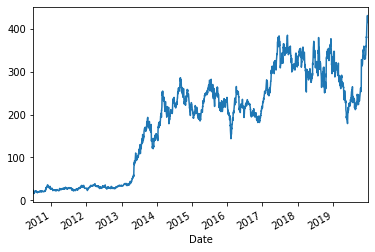

In [7]:
tesla['Close'].plot()

In [8]:
symbol = 'F'
data_source='yahoo'
start_date = '2010-01-01'
end_date = '2020-01-01'

ford = web.DataReader(symbol, data_source, start_date, end_date)

In [9]:
symbol = 'GM'
data_source='yahoo'
start_date = '2010-01-01'
end_date = '2020-01-01'

gm = web.DataReader(symbol, data_source, start_date, end_date)

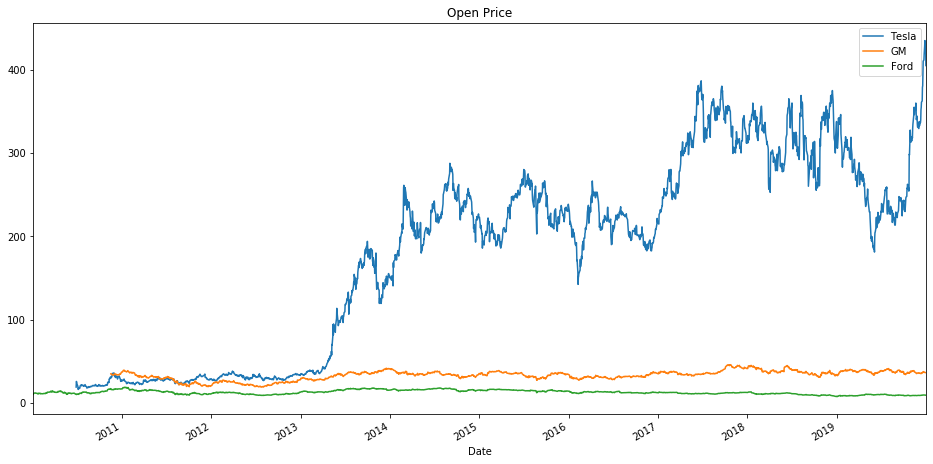

In [10]:
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

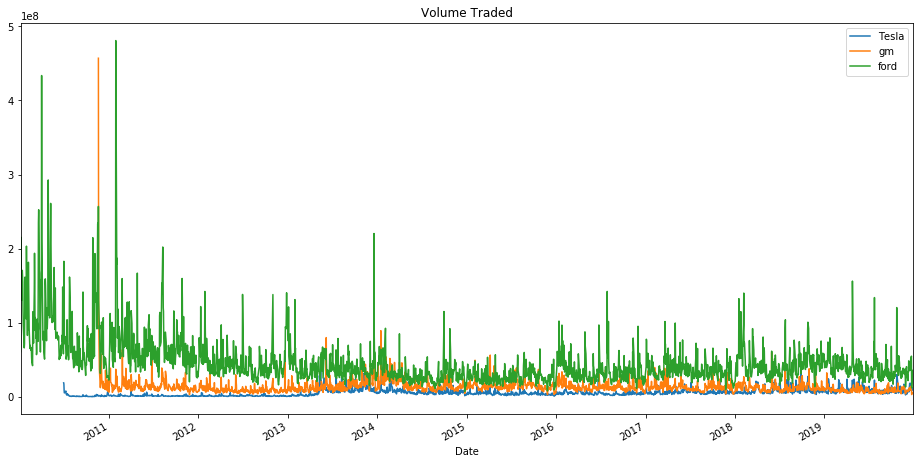

In [11]:
#Plot the Volume of stock traded each day
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [12]:
tesla['Total Traded'] = tesla['Open']*tesla['Volume']
ford['Total Traded'] = ford['Open']*ford['Volume']
gm['Total Traded'] = gm['Open']*gm['Volume']

Text(0, 0.5, 'Total Traded')

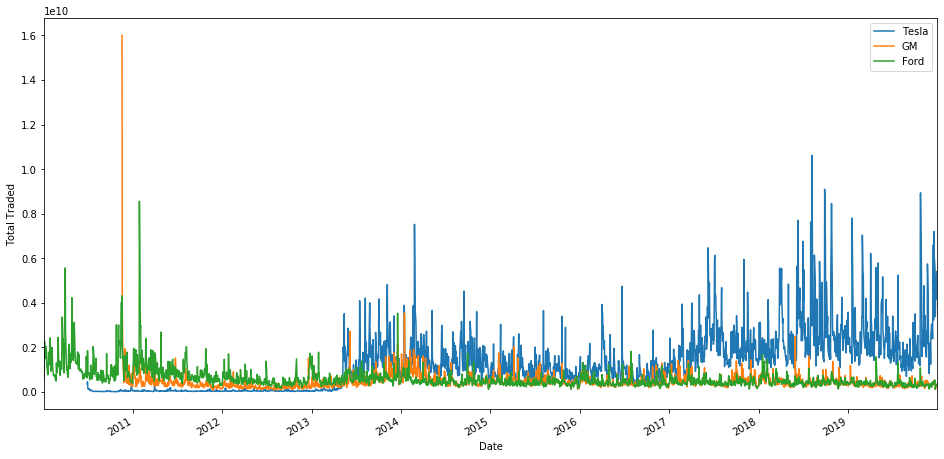

In [13]:
tesla['Total Traded'].plot(label='Tesla',figsize=(16,8))
gm['Total Traded'].plot(label='GM')
ford['Total Traded'].plot(label='Ford')
plt.legend()
plt.ylabel('Total Traded')

In [14]:
gm['Total Traded'].argmax()

/Users/matinmahboob/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


Timestamp('2010-11-18 00:00:00')

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

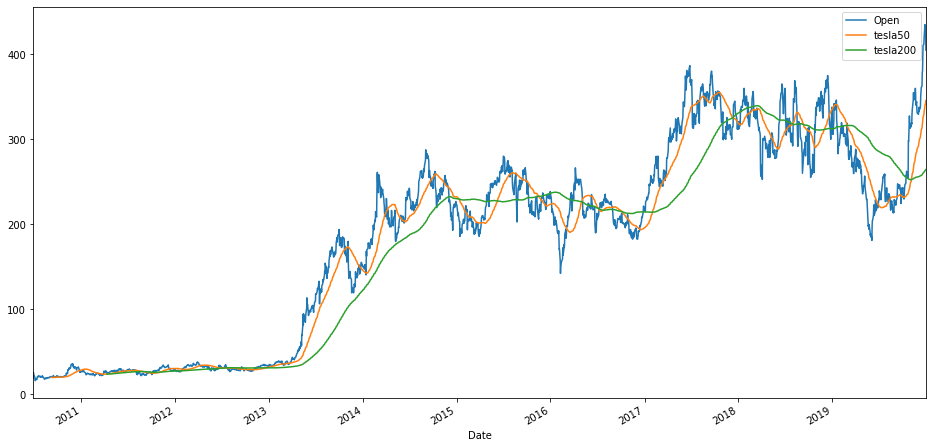

In [15]:
tesla['tesla50'] = tesla['Open'].rolling(50).mean()
tesla['tesla200'] = tesla['Open'].rolling(200).mean()
tesla[['Open','tesla50','tesla200']].plot(label='tesla',figsize=(16,8))

Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry.

In [20]:
from pandas.plotting import scatter_matrix

In [21]:
car_comp = pd.concat([tesla['Open'],gm['Open'],ford['Open']],axis=1)

In [22]:
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

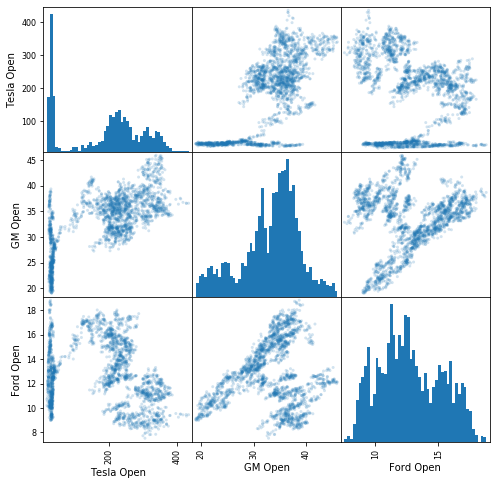

In [34]:
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

#### Which stock is the most "volatile"?
##### Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

In [27]:
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

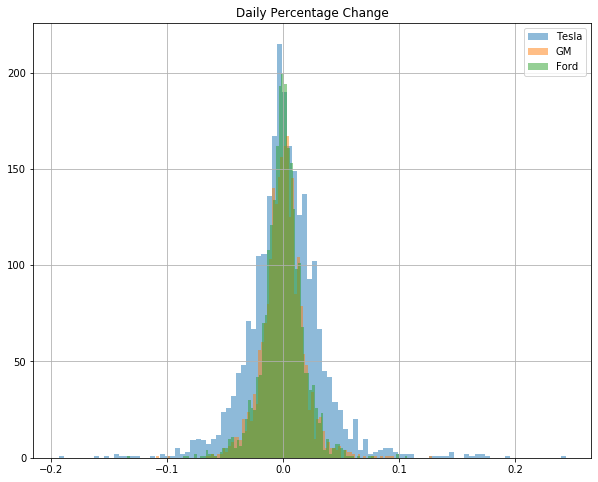

In [31]:
tesla['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
gm['returns'].hist(bins=100,label='GM',alpha=0.5)
ford['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.title('Daily Percentage Change')
plt.legend()

Tesla seems to be the better choice to invest in, however it is more volatile than others!